# Diabetes Dataset - SVM

## Total 2 model are made

In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\roari\Downloads\DiabetesNew\diabetes_prediction.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.size

900000

In [5]:
df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
duplicate_count = df.duplicated().sum()

In [11]:
duplicate_count

3854

In [12]:
# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()

# Check the shape after dropping duplicates
print("Shape after dropping duplicates:")
df_no_duplicates.shape

Shape after dropping duplicates:


(96146, 9)

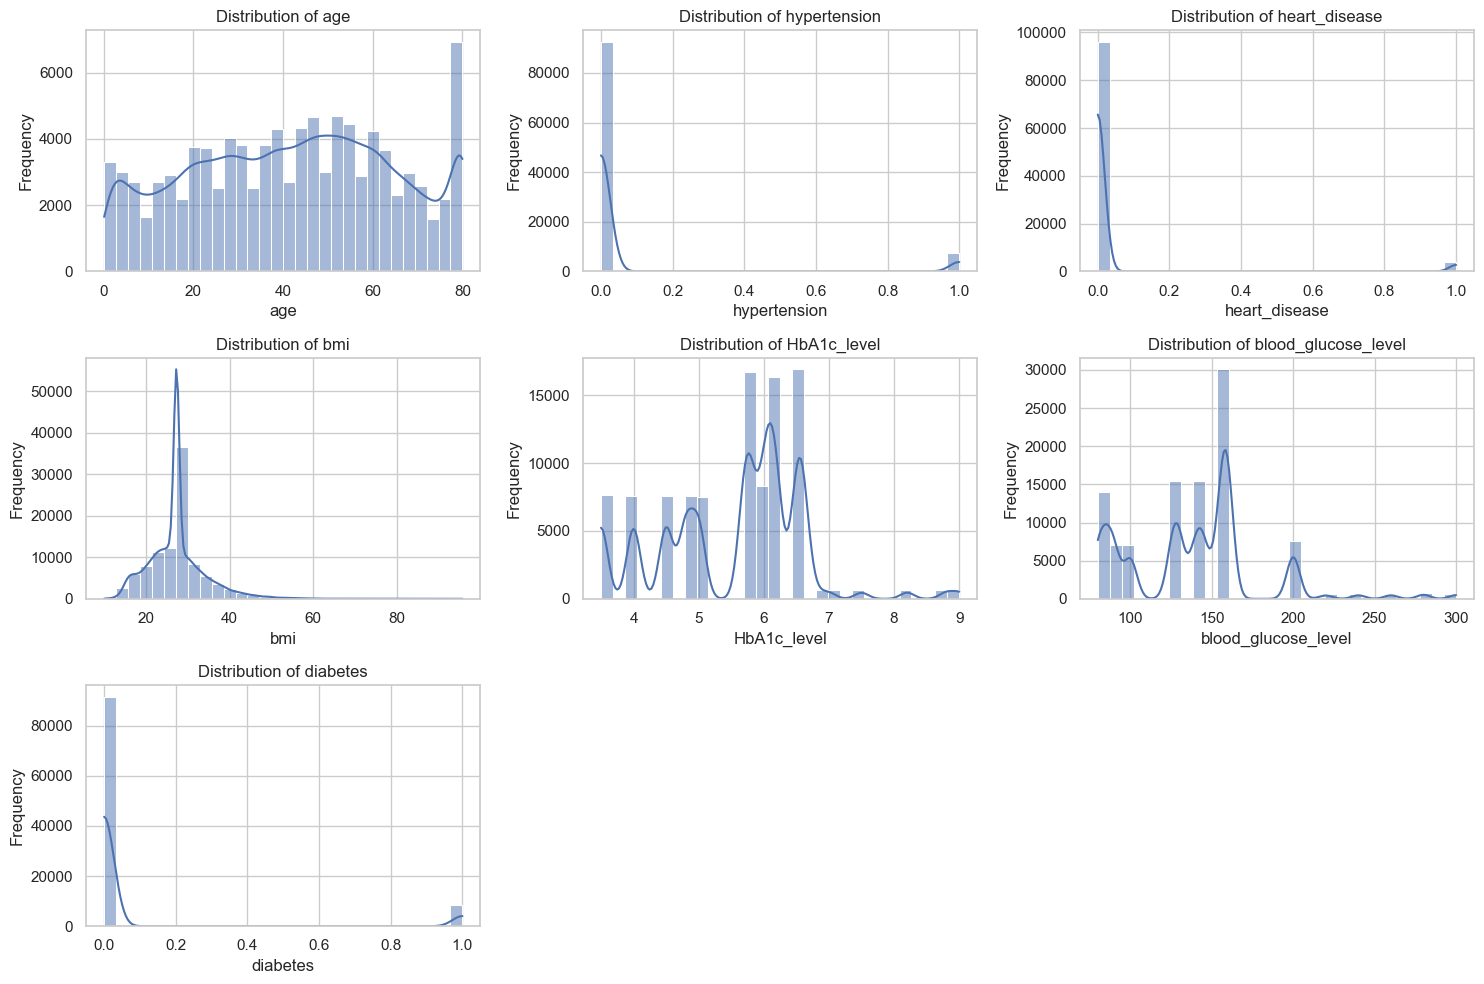

<Figure size 1000x500 with 0 Axes>

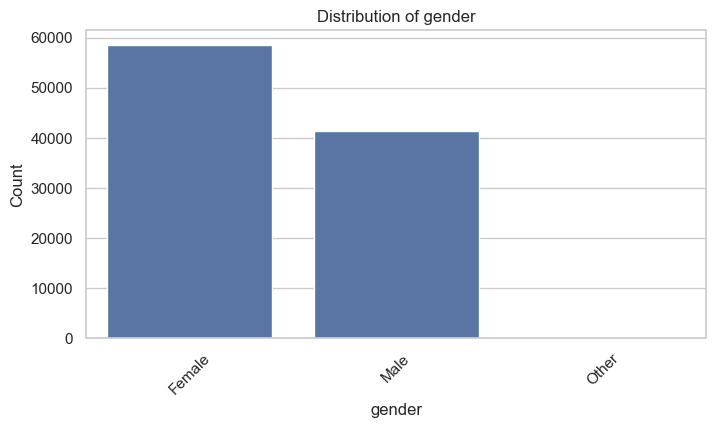

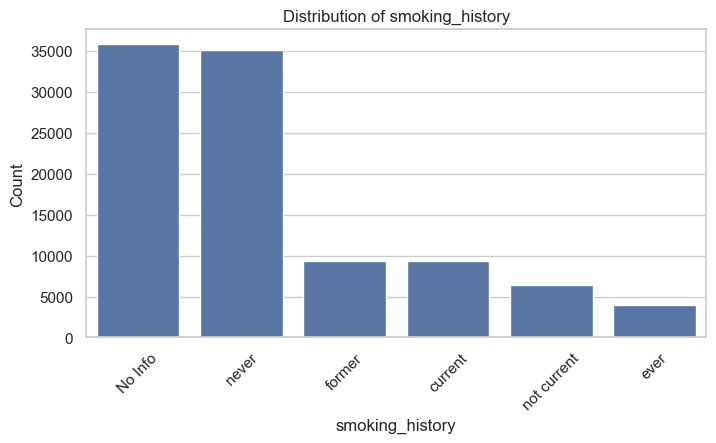

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create histograms for categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(10, 5))
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


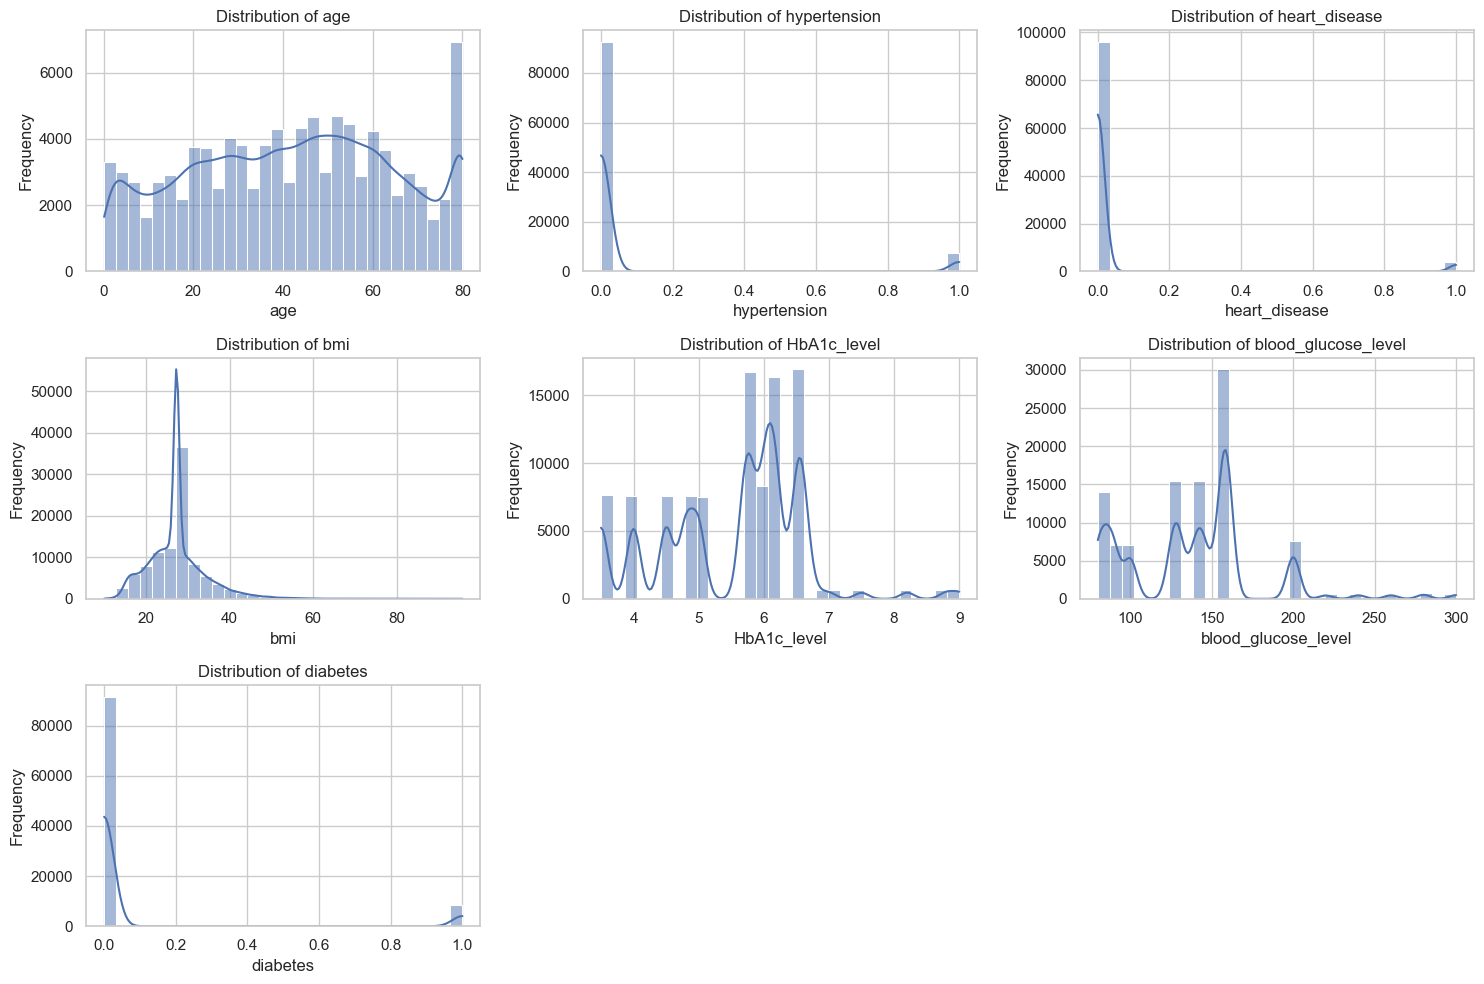

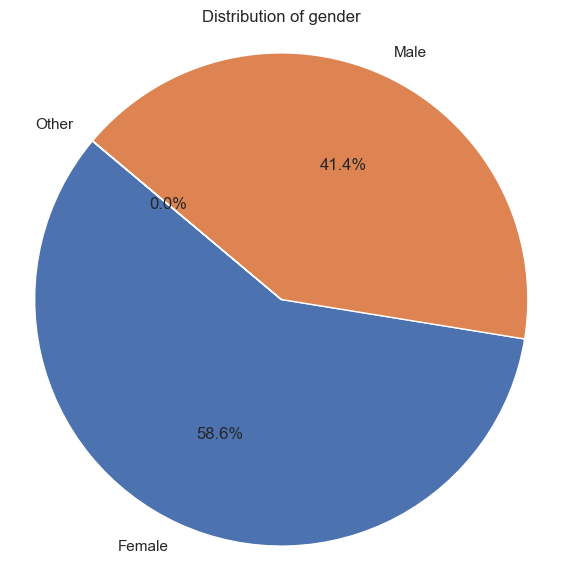

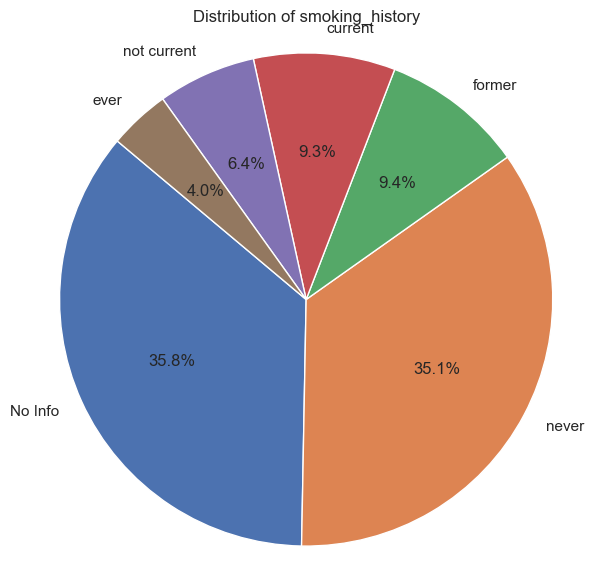

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot pie charts for categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    plt.figure(figsize=(7, 7))
    data_counts = df[feature].value_counts()
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


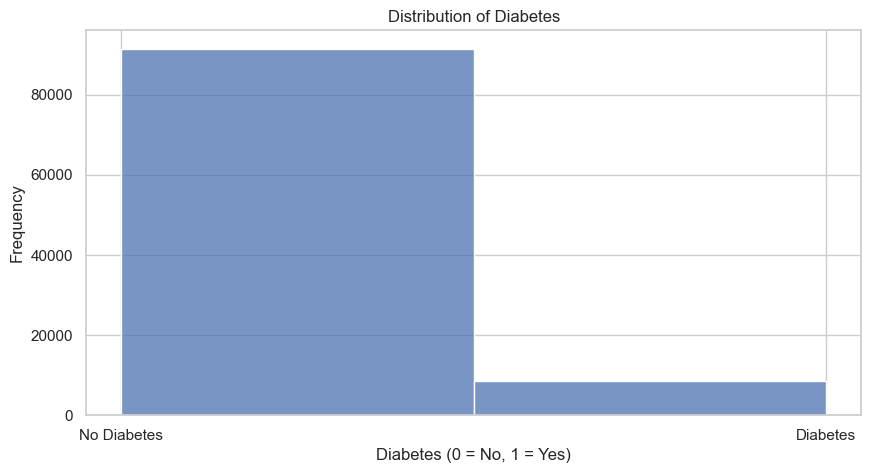

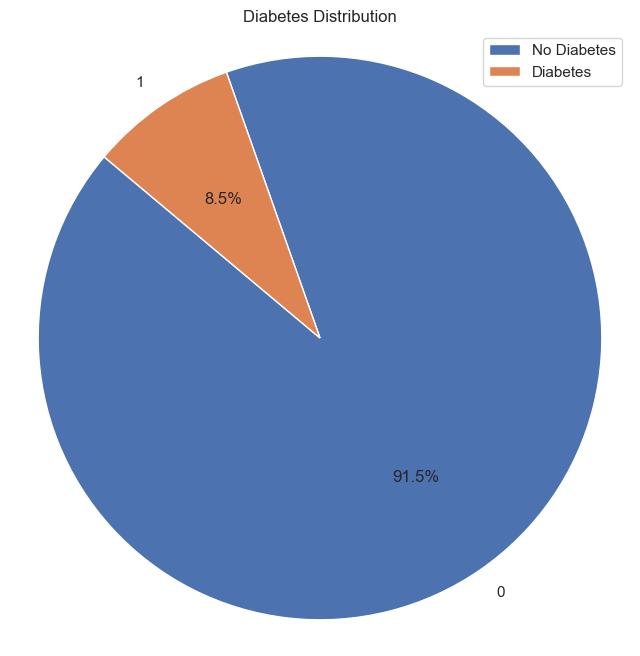

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for the diabetes distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['diabetes'], bins=2, kde=False)
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Rename x-ticks
plt.show()

# Pie chart for diabetes distribution
plt.figure(figsize=(8, 8))
diabetes_counts = df['diabetes'].value_counts()
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(['No Diabetes', 'Diabetes'])  # Adding a legend for clarity
plt.show()


In [16]:
# Separate the majority and minority classes
majority_class = df[df['diabetes'] == 0]
minority_class = df[df['diabetes'] == 1]

# Undersample the majority class
majority_class_undersampled = majority_class.sample(n=8000, random_state=42)

# Combine the undersampled majority class with the minority class
balanced_df = pd.concat([majority_class_undersampled, minority_class])

# Check the new distribution
new_distribution = balanced_df['diabetes'].value_counts()
new_distribution_percentage = new_distribution / new_distribution.sum() * 100

print("New Diabetes Count and Percentage:")
print(new_distribution)
print(new_distribution_percentage)


New Diabetes Count and Percentage:
diabetes
1    8500
0    8000
Name: count, dtype: int64
diabetes
1    51.515152
0    48.484848
Name: count, dtype: float64


In [17]:
# Perform one-hot encoding for the nominal categorical features
encoded_df = pd.get_dummies(balanced_df, columns=['gender', 'smoking_history'], drop_first=True)

# Display the first few rows of the encoded dataframe
encoded_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
21737,35.0,0,0,27.32,3.5,200,0,False,False,False,False,False,False,False
62807,66.0,0,0,27.32,4.5,145,0,True,False,False,False,False,False,False
38693,32.0,0,0,32.71,6.6,90,0,True,False,False,False,False,True,False
72875,46.0,0,0,32.78,4.0,80,0,True,False,False,False,False,False,False
14817,22.0,0,0,23.51,4.5,158,0,False,False,False,False,False,True,False


In [18]:
# Convert boolean values to integers (0 and 1)
encoded_df[encoded_df.columns[encoded_df.columns.str.startswith('gender_')]] = encoded_df[encoded_df.columns[encoded_df.columns.str.startswith('gender_')]].astype(int)
encoded_df[encoded_df.columns[encoded_df.columns.str.startswith('smoking_history_')]] = encoded_df[encoded_df.columns[encoded_df.columns.str.startswith('smoking_history_')]].astype(int)

# Display the first few rows of the updated encoded dataframe
encoded_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
21737,35.0,0,0,27.32,3.5,200,0,0,0,0,0,0,0,0
62807,66.0,0,0,27.32,4.5,145,0,1,0,0,0,0,0,0
38693,32.0,0,0,32.71,6.6,90,0,1,0,0,0,0,1,0
72875,46.0,0,0,32.78,4.0,80,0,1,0,0,0,0,0,0
14817,22.0,0,0,23.51,4.5,158,0,0,0,0,0,0,1,0


Train Accuracy: 0.8541666666666666
Test Accuracy: 0.8536363636363636

Classification Report:
{'0': {'precision': 0.8822299651567944, 'recall': 0.8012658227848102, 'f1-score': 0.8398009950248756, 'support': 1580.0}, '1': {'precision': 0.8316353887399464, 'recall': 0.9017441860465116, 'f1-score': 0.8652719665271966, 'support': 1720.0}, 'accuracy': 0.8536363636363636, 'macro avg': {'precision': 0.8569326769483704, 'recall': 0.8515050044156609, 'f1-score': 0.852536480776036, 'support': 3300.0}, 'weighted avg': {'precision': 0.8558594586607402, 'recall': 0.8536363636363636, 'f1-score': 0.8530767741109337, 'support': 3300.0}}


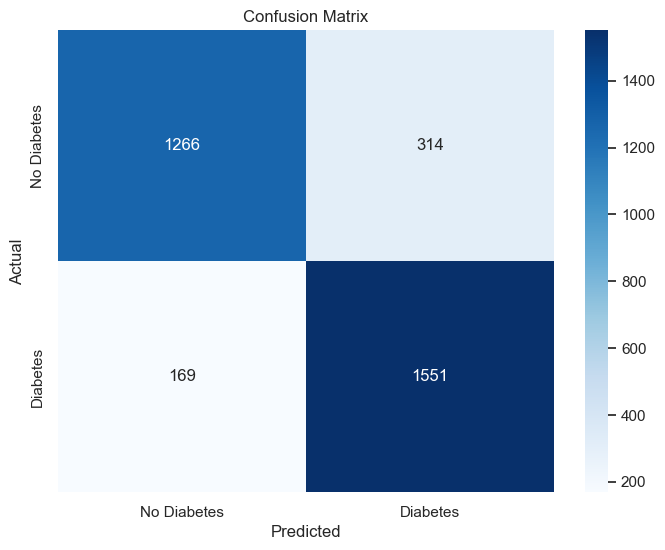

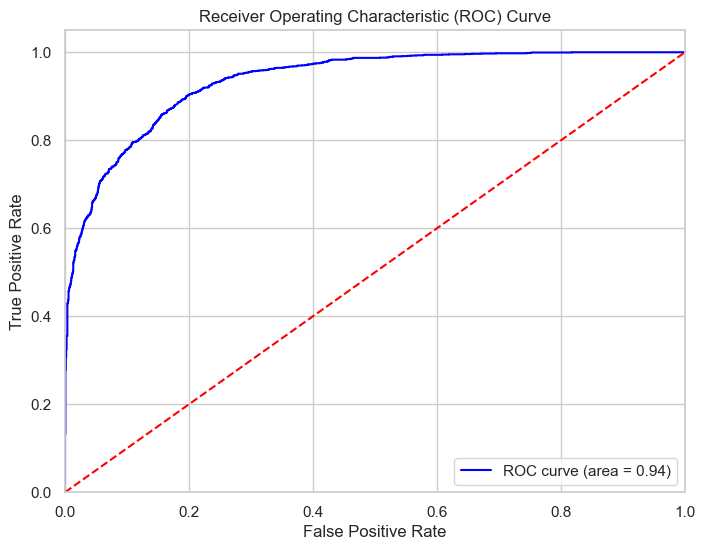

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `encoded_df` is your processed DataFrame

# Define features and target variable
X = encoded_df.drop('diabetes', axis=1)  # Features
y = encoded_df['diabetes']                 # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
model = SVC(probability=True)  # Setting probability=True for ROC curve
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = model.score(X_test, y_test)
print(f'Train Accuracy: {model.score(X_train, y_train)}')
print(f'Test Accuracy: {accuracy}')

# Calculate precision, recall, F1 score, and support
report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Reduced Test Accuracy: 0.925

Classification Report (Reduced Dataset):
{'0': {'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1-score': 0.9166666666666666, 'support': 36.0}, '1': {'precision': 0.9318181818181818, 'recall': 0.9318181818181818, 'f1-score': 0.9318181818181818, 'support': 44.0}, 'accuracy': 0.925, 'macro avg': {'precision': 0.9242424242424242, 'recall': 0.9242424242424242, 'f1-score': 0.9242424242424242, 'support': 80.0}, 'weighted avg': {'precision': 0.925, 'recall': 0.925, 'f1-score': 0.925, 'support': 80.0}}


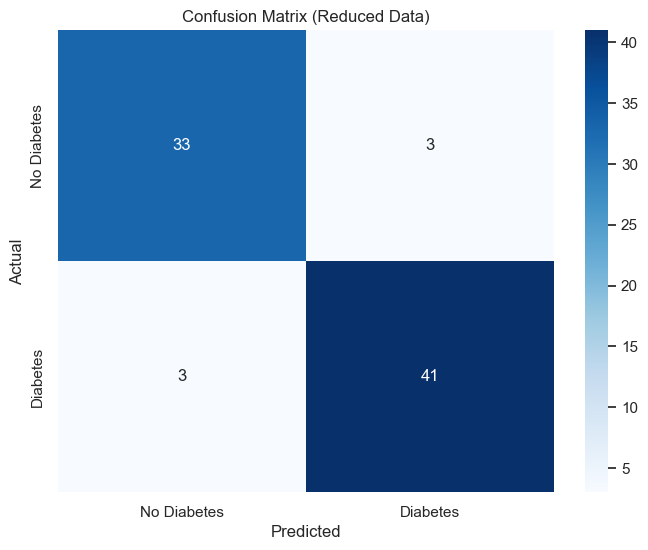

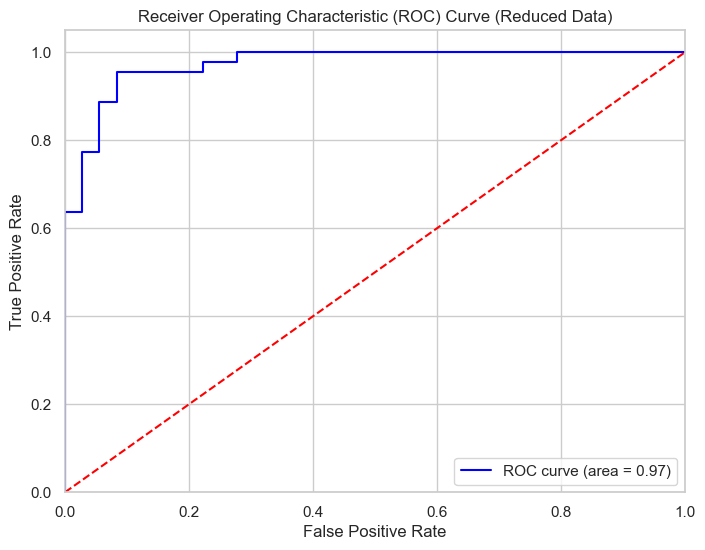

In [22]:
# Subsampling the data (200 samples from each class)
diabetic_data = encoded_df[encoded_df['diabetes'] == 1].sample(200, random_state=42)
non_diabetic_data = encoded_df[encoded_df['diabetes'] == 0].sample(200, random_state=42)

# Combine the subsamples
reduced_df = pd.concat([diabetic_data, non_diabetic_data])

# Define features and target variable for the reduced dataset
X_reduced = reduced_df.drop('diabetes', axis=1)  # Features
y_reduced = reduced_df['diabetes']               # Target variable

# Split the reduced data into training and testing sets (80% train, 20% test)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],       # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],   # Kernel coefficient for 'rbf'
}

# Create a GridSearchCV object with 3-fold cross-validation
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=1, cv=3)

# Fit the model on the reduced dataset
grid.fit(X_train_reduced, y_train_reduced)

# Print the best parameters found
print(f'Best Parameters: {grid.best_params_}')

# Make predictions with the best model
y_pred_reduced = grid.predict(X_test_reduced)

# Calculate accuracy
accuracy_reduced = grid.score(X_test_reduced, y_test_reduced)
print(f'Reduced Test Accuracy: {accuracy_reduced}')

# Generate classification report
report_reduced = classification_report(y_test_reduced, y_pred_reduced, output_dict=True)
print("\nClassification Report (Reduced Dataset):")
print(report_reduced)

# Confusion Matrix for reduced data
conf_matrix_reduced = confusion_matrix(y_test_reduced, y_pred_reduced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_reduced, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Reduced Data)')
plt.show()

# Calculate ROC Curve for reduced data
y_prob_reduced = grid.predict_proba(X_test_reduced)[:, 1]  # Get probabilities for the positive class
fpr_reduced, tpr_reduced, thresholds_reduced = roc_curve(y_test_reduced, y_prob_reduced)
roc_auc_reduced = roc_auc_score(y_test_reduced, y_prob_reduced)

# Plot ROC Curve for reduced data
plt.figure(figsize=(8, 6))
plt.plot(fpr_reduced, tpr_reduced, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_reduced)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Reduced Data)')
plt.legend(loc='lower right')
plt.show()
